In [2]:
import sys
import calnet.calnet as cc
import calnet.dynamics as dyn
import numpy as np
from importlib import reload
import pdb
import matplotlib.pyplot as plt
import glob
import calnet.utils as utils
import pyute as ut
import size_contrast_analysis as sca
import scipy.stats as sst
import os
import opto_utils
reload(cc)
reload(utils)

/Users/dan/Documents/code/downloads/OASIS/oasis/functions.py:14: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


<module 'calnet.utils' from '/Users/dan/Documents/code/adesnal/calnet/utils.py'>

In [81]:
# fit_lbl = '201128b'
# fit_lbl = '201203g'
fit_lbl = '201215b'
npyfile = np.load('../shared_data/calnet_data/dynamics/opto_tavg_%s.npy'%fit_lbl,allow_pickle=True)[()]
shp = npyfile['YY_opto'].shape
YY_opto_tavg1 = npyfile['YY_opto'].reshape(shp[:2]+(6,6)+shp[3:])
weights_files = glob.glob('../shared_data/calnet_data/weights/weights_%s/*.npy'%fit_lbl)
weights_files.sort()

In [3]:
int(6/(-132))

0

In [6]:
# fit_lbl = '201203g'
# fit_lbl = '201215b'
fit_lbl = '210513c'
npyfile = np.load('../shared_data/calnet_data/dynamics/vip_opto_tavg_w_recurrence_%s.npy'%fit_lbl,allow_pickle=True)[()]
shp = npyfile['YY_opto'].shape
YY_opto_tavg = npyfile['YY_opto'].reshape(shp[:2]+(6,6)+shp[3:])
YY_opto_tavg_no_pcpc = npyfile['YY_opto_no_pcpc'].reshape(shp[:2]+(6,6)+shp[3:])
YY_opto_tavg_no_pcpv = npyfile['YY_opto_no_pcpv'].reshape(shp[:2]+(6,6)+shp[3:])
weights_files = glob.glob('../shared_data/calnet_data/weights/weights_%s/*.npy'%fit_lbl)
weights_files.sort()

FileNotFoundError: [Errno 2] No such file or directory: '../shared_data/calnet_data/dynamics/vip_opto_tavg_w_recurrence_210513c.npy'

In [83]:
npyfile = np.load('../shared_data/calnet_data/dynamics/vip_opto_tavg_w_recurrence_%s.npy'%fit_lbl,allow_pickle=True)[()]
print(npyfile.keys())

FileNotFoundError: [Errno 2] No such file or directory: '../shared_data/calnet_data/dynamics/vip_opto_tavg_w_recurrence_201215b.npy'

In [84]:
# fit_lbl = '201203g'
fit_lbl = '201215b'
npyfile = np.load('../shared_data/calnet_data/dynamics/vip_chrimson_l23_as_l4_opto_tavg_wpcpv_%s.npy'%fit_lbl,allow_pickle=True)[()]
shp = npyfile['YY_opto'].shape
YY_chrimson = npyfile['YY_opto'].reshape(shp[:2]+(6,6)+shp[3:])
YY_chrimson_no_pcpc = npyfile['YY_opto_no_pcpc'].reshape(shp[:2]+(6,6)+shp[3:])
YY_chrimson_no_pcpv = npyfile['YY_opto_no_pcpv'].reshape(shp[:2]+(6,6)+shp[3:])
YY_chrimson_no_pcvip = npyfile['YY_opto_no_pcvip'].reshape(shp[:2]+(6,6)+shp[3:])
YY_chrimson_no_pcsst = npyfile['YY_opto_no_pcsst'].reshape(shp[:2]+(6,6)+shp[3:])
YY_chrimson_no_vipbias = npyfile['YY_opto_no_vipbias'].reshape(shp[:2]+(6,6)+shp[3:])
weights_files = glob.glob('../shared_data/calnet_data/weights/weights_%s/*.npy'%fit_lbl)
weights_files.sort()

In [85]:
npyfile = np.load('../shared_data/calnet_data/dynamics/vip_chrimson_l23_as_l4_opto_tavg_%s.npy'%fit_lbl,allow_pickle=True)[()]
shp = npyfile['YY_opto'].shape
YY_chrimson = npyfile['YY_opto'].reshape(shp[:2]+(6,6)+shp[3:])
XX_chrimson = npyfile['XX_opto'].reshape(shp[:1]+(6,6,4))

In [86]:
npyfile['XX_opto'].shape

(429, 36, 4)

In [87]:
# fit_lbl = '201203g'
fit_lbl = '201215b'
npyfile = np.load('../shared_data/calnet_data/dynamics/vip_halo_l4_opto_tavg_wpcpv_%s.npy'%fit_lbl,allow_pickle=True)[()]
shp = npyfile['YY_opto'].shape
YY_halo = npyfile['YY_opto'].reshape(shp[:2]+(6,6)+shp[3:])
YY_halo_no_pcpc = npyfile['YY_opto_no_pcpc'].reshape(shp[:2]+(6,6)+shp[3:])
YY_halo_no_pcpv = npyfile['YY_opto_no_pcpv'].reshape(shp[:2]+(6,6)+shp[3:])
YY_halo_no_pcvip = npyfile['YY_opto_no_pcvip'].reshape(shp[:2]+(6,6)+shp[3:])
YY_halo_no_pcsst = npyfile['YY_opto_no_pcsst'].reshape(shp[:2]+(6,6)+shp[3:])
YY_halo_no_vipbias = npyfile['YY_opto_no_vipbias'].reshape(shp[:2]+(6,6)+shp[3:])
weights_files = glob.glob('../shared_data/calnet_data/weights/weights_%s/*.npy'%fit_lbl)
weights_files.sort()

In [88]:
# npyfile = np.load('../shared_data/calnet_data/dynamics/vip_halo_l23_as_l4_opto_tavg_%s.npy'%fit_lbl,allow_pickle=True)[()]
# shp = npyfile['YY_opto'].shape
# YY_halo = npyfile['YY_opto'].reshape(shp[:2]+(6,6)+shp[3:])
# XX_halo = npyfile['XX_opto'].reshape(shp[:1]+(6,6,4))

In [89]:
opto_levels = 1*np.linspace(-2,2,21)

In [90]:
nwt = len(weights_files)
mdls = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    mdls[iwt] = cc.ModelOri(wtdict,nT=1)

In [91]:
iwt = 0
nQ,nS,nT = mdls[iwt].nQ,mdls[iwt].nS,mdls[iwt].nT
bltiles = np.zeros((nwt,nQ*nS*nT))
amps = np.ones((nwt,nQ*nS*nT))
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    if 'bl' in wtdict:
        bl = wtdict['bl']
        bltiles[iwt] = np.tile(bl,nS*nT)
    if 'amp' in wtdict:
        amps[iwt] = wtdict['amp']

In [92]:
opto_levels = np.linspace(-2,2,21)
nopto = opto_levels.size

In [93]:
YY_opto_tavg.shape

(372, 21, 6, 6, 8)

In [94]:
import calnet.utils
import sim_utils
nfiles = len(weights_files)
# Ts = np.zeros((nfiles,nQ))
iwt = 0
nN,nP,nQ,nS,nT = mdls[iwt].nN,mdls[iwt].nP,mdls[iwt].nQ,mdls[iwt].nS,mdls[iwt].nT
Ks = np.zeros((nfiles,nQ))
Wmys = np.zeros((nfiles,nQ,nQ))
Wmxs = np.zeros((nfiles,nP,nQ))
s02s = np.zeros((nfiles,nQ))
YYs = np.zeros((nfiles,6,6,nQ*nS*nT))
XXs = np.zeros((nfiles,6,6,nP*nS*nT))
Etas = np.zeros((nfiles,6,6,nQ*nS*nT))
# Eta1s = np.zeros((nfiles,6,6,nQ*nS*nT))
# Eta2s = np.zeros((nfiles,6,6,nQ*nS*nT))
h1s = np.zeros((nfiles,))
h2s = np.zeros((nfiles,))
losses = np.zeros((nfiles,))
couplings = np.zeros((nfiles,nopto,6,6,nQ*nS*nT,nQ*nS*nT))
phis = np.zeros((nfiles,nopto,6,6,nQ*nS*nT))
for iwt,weights_file in enumerate(weights_files):
    Wstar_dict = np.load(weights_file,allow_pickle=True)[()]
#     Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h = Wstar_dict['as_list']
    try:
        Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,bl = Wstar_dict['as_list']
        amp = np.ones((nQ*nS*nT,))
    except:
        Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,bl,amp = Wstar_dict['as_list']
    losses[iwt] = Wstar_dict['loss']
#     Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,h3,Eta1,Eta2,Eta3 = Wstar_dict['as_list']
    WWmy = calnet.utils.gen_Weight_k_kappa_t(Wmy,K,kappa,T,nS=nS,nT=nT)
    WWmx = calnet.utils.gen_Weight_k_kappa_t(Wmx,K,kappa,T,nS=nS,nT=nT)
    tiled_s02 = np.tile(s02,nS*nT)
#     Ts[iwt] = T
    Ks[iwt] = K
    Wmys[iwt] = Wmy
    Wmxs[iwt] = Wmx
    s02s[iwt] = s02
    YY0 = sim_utils.f_miller_troyer(Eta,Xi**2+tiled_s02)
    YYs[iwt] = amp*YY0.reshape((6,6,nQ*nS*nT)) + np.tile(bl,nS*nT)[np.newaxis]
    XXs[iwt] = XX.reshape((6,6,nP*nS*nT))
    Etas[iwt] = Eta.reshape((6,6,nQ*nS*nT))
    h1s[iwt] = h1
    h2s[iwt] = h2
    bltile = np.tile(bl,nS*nT)
    for ilight in range(YY_opto_tavg.shape[1]):
        this_YY = 1/amp[np.newaxis,:]*(YY_opto_tavg[iwt,ilight].reshape((nN,nQ*nS*nT)) - bltile[np.newaxis,:])
#         this_YY = YY_opto_tavg[iwt,ilight].reshape((nN,nQ*nS*nT))
        phis[iwt,ilight] = mdls[iwt].fprimeXY(mdls[iwt].XX,this_YY).reshape((6,6,nQ*nS*nT))
    for istim in range(nN):
        iistim,jjstim = np.unravel_index(istim,(6,6))
#         phis[iwt,iistim,jjstim] = calnet.utils.fprime_miller_troyer(Eta[istim],Xi[istim]**2+tiled_s02)
        for ilight in range(nopto):
            Phi = np.diag(phis[iwt,ilight,iistim,jjstim])
            couplings[iwt,ilight,iistim,jjstim] = Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)

IndexError: index 372 is out of bounds for axis 0 with size 372

In [ ]:
plt.figure()
plt.hist(losses[losses<100])
lcutoff = np.nanpercentile(losses,10)
low_loss = (losses<lcutoff)

In [ ]:
ilight_halo = 5
ilight_chrimson = 15#15
ilight_off = 10


In [4]:
reload(ut)
itype = 1
plt.figure(figsize=(2.5,2.5))
xdata = YY_opto_tavg[low_loss][:,ilight_off,:,:,itype]
norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
xdata_norm = xdata/norm_factor
ydata = YY_opto_tavg[low_loss][:,ilight_halo,:,:,itype]
ydata_norm = ydata/norm_factor
sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
plt.axhline(0,c='k',linestyle='dashed')
plt.ylim((-0.12,0.8))
ut.erase_top_right()
plt.xlabel('baseline SST firing rate/mean')
plt.ylabel('$\Delta$ SST firing rate/mean, \n VIP silencing')
plt.tight_layout()
# plt.savefig('figures/sim_sst_delta_vip_halo.eps')

NameError: name 'YY_opto_tavg' is not defined

<Figure size 180x180 with 0 Axes>

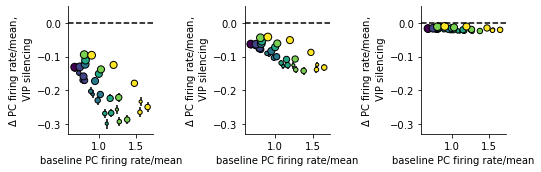

In [19]:
plt.figure(figsize=(7.5,2.5))
for iYY,this_YY in enumerate([YY_opto_tavg[low_loss],YY_opto_tavg_no_pcpv[low_loss],YY_opto_tavg_no_pcpc[low_loss]]):
    reload(ut)
    itype = 0
    plt.subplot(1,3,iYY+1)
    xdata = this_YY[:,ilight_off,:,:,itype]
    norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
    xdata_norm = xdata/norm_factor
    ydata = this_YY[:,ilight_halo,:,:,itype]
    ydata_norm = ydata/norm_factor
    sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.ylim((-0.33,0.05))
    ut.erase_top_right()
    plt.xlabel('baseline PC firing rate/mean')
    plt.ylabel('$\Delta$ PC firing rate/mean, \n VIP silencing')
    plt.tight_layout()
#     plt.savefig('figures/sim_pc_delta_vip_halo_w_and_wo_recurrence.eps')

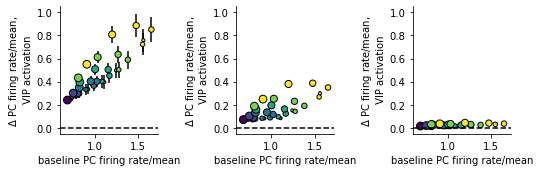

In [28]:
ilight_chrimson = 15
plt.figure(figsize=(7.5,2.5))
for iYY,this_YY in enumerate([YY_opto_tavg[low_loss],YY_opto_tavg_no_pcpv[low_loss],YY_opto_tavg_no_pcpc[low_loss]]):
    reload(ut)
    itype = 0
    plt.subplot(1,3,iYY+1)
    xdata = this_YY[:,ilight_off,:,:,itype]
    norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
    xdata_norm = xdata/norm_factor
    ydata = this_YY[:,ilight_chrimson,:,:,itype]
    ydata_norm = ydata/norm_factor
    sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.ylim((-0.05,1.05))
    ut.erase_top_right()
    plt.xlabel('baseline PC firing rate/mean')
    plt.ylabel('$\Delta$ PC firing rate/mean, \n VIP activation')
    plt.tight_layout()
#     plt.savefig('figures/sim_pc_delta_vip_chrimson_w_and_wo_recurrence.eps')

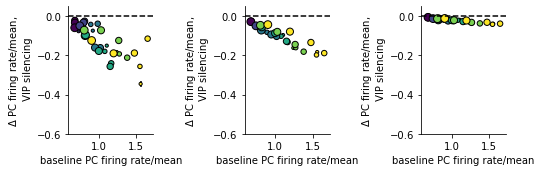

In [21]:
YYs_baseline = [YY_opto_tavg[low_loss],YY_opto_tavg_no_pcpv[low_loss],YY_opto_tavg_no_pcpc[low_loss]]
YYs_opto = [YY_halo[low_loss],YY_halo_no_pcpv[low_loss],YY_halo_no_pcpc[low_loss]]
# YYs_baseline = YYs_baseline[:2]
# YYs_opto = YYs_opto[0,2]
plt.figure(figsize=(7.5,2.5))
# plt.figure(figsize=(5,2.5))
for iYY,(this_YYx,this_YYy) in enumerate(zip(YYs_baseline,YYs_opto)):
    reload(ut)
    itype = 0
    plt.subplot(1,3,iYY+1)
#     plt.subplot(1,2,iYY+1)
    xdata = this_YYx[:,ilight_off,:,:,itype]
    norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
    xdata_norm = xdata/norm_factor
    ydata = this_YYy[:,0,:,:,itype] #this_YYx[:,ilight_halo,:,:,itype]#
    ydata_norm = ydata/norm_factor
    sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.ylim((-0.6,0.05))
    ut.erase_top_right()
    plt.xlabel('baseline PC firing rate/mean')
    plt.ylabel('$\Delta$ PC firing rate/mean, \n VIP silencing')
    plt.tight_layout()
#     plt.savefig('figures/sim_pc_delta_vip_halo_l4_w_and_wo_recurrence.eps')

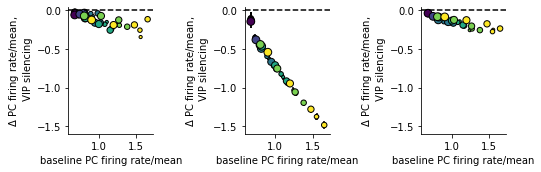

In [23]:
YYs_baseline = [YY_opto_tavg[low_loss],YY_opto_tavg[low_loss],YY_opto_tavg[low_loss]]
YYs_opto = [YY_halo[low_loss],YY_halo_no_pcsst[low_loss],YY_halo_no_pcvip[low_loss]]
# YYs_baseline = YYs_baseline[:2]
# YYs_opto = YYs_opto[0,2]
plt.figure(figsize=(7.5,2.5))
# plt.figure(figsize=(5,2.5))
for iYY,(this_YYx,this_YYy) in enumerate(zip(YYs_baseline,YYs_opto)):
    reload(ut)
    itype = 0
    plt.subplot(1,3,iYY+1)
#     plt.subplot(1,2,iYY+1)
    xdata = this_YYx[:,ilight_off,:,:,itype]
    norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
    xdata_norm = xdata/norm_factor
    ydata = this_YYy[:,0,:,:,itype] #this_YYx[:,ilight_halo,:,:,itype]#
    ydata_norm = ydata/norm_factor
    sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.ylim((-1.6,0.05))
    ut.erase_top_right()
    plt.xlabel('baseline PC firing rate/mean')
    plt.ylabel('$\Delta$ PC firing rate/mean, \n VIP silencing')
    plt.tight_layout()
#     plt.savefig('figures/sim_pc_delta_vip_halo_l4_w_and_wo_recurrence.eps')

In [343]:
YY_halo_no_pcvip.shape

(372, 1, 6, 6, 8)

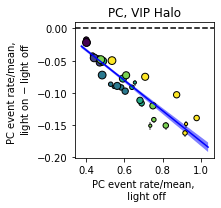

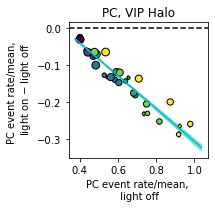

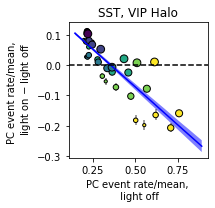

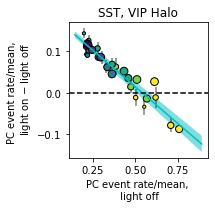

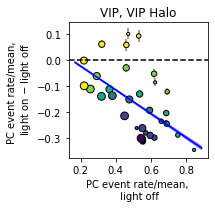

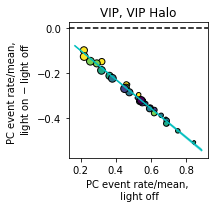

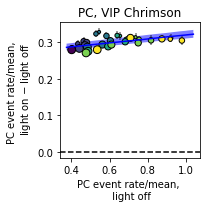

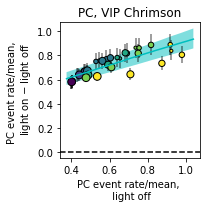

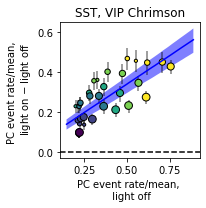

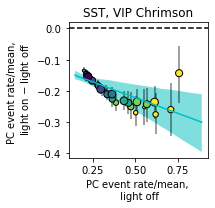

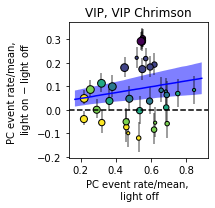

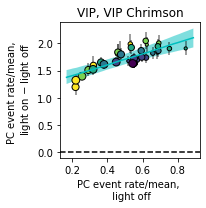

In [44]:
iresp = 3
celltype_lbls = ['PC','SST','VIP']
light_lbls = ['VIP Halo','VIP Chrimson']
network_resp_baseline = YY_opto_tavg[low_loss]
network_resps = [[YY_halo_no_pcvip[low_loss],YY_halo[low_loss]],[YY_chrimson_no_pcvip[low_loss],YY_chrimson[low_loss]]]
for ilight in [0,1]:
    for itype in [0,1,2]:
        
        for iresp,c in zip([0,1],['b','c']):
            plt.figure(figsize=(2.5,2.5))
            zdata = network_resp_baseline[:,:,:,:,itype]
            xdata = network_resps[ilight][iresp][:,:,:,:,itype]
            this_data = np.concatenate((zdata[:,ilight_off:ilight_off+1,:,:],xdata),axis=1)
            opto_utils.scatter_size_contrast_x_dx_errorbar(this_data.transpose((0,2,3,1)),opto_color=c)
            plt.title('%s, %s'%(celltype_lbls[itype],light_lbls[ilight]))

In [47]:
network_resp_baseline[:,:,:,:,itype].shape

(38, 21, 6, 6)

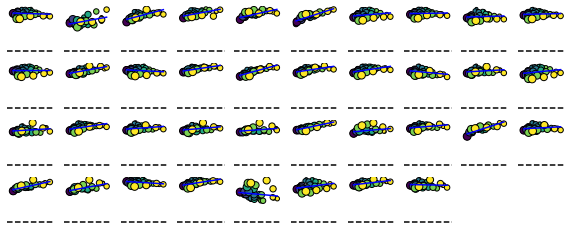

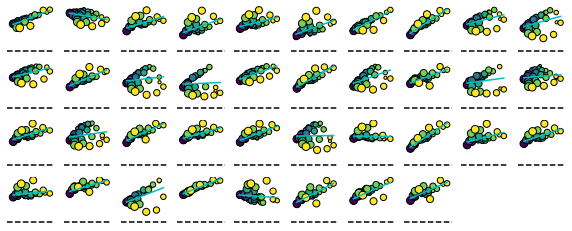

In [50]:
iresp = 3
celltype_lbls = ['PC','SST','VIP']
light_lbls = ['VIP Halo','VIP Chrimson']
network_resp_baseline = YY_opto_tavg[low_loss]
network_resps = [[YY_chrimson_no_pcvip[low_loss],YY_chrimson[low_loss]]]
for ilight in [0]:
    for itype in [0]:
        
        for iresp,c in zip([0,1],['b','c']):
#             plt.figure(figsize=(2.5,2.5))
            plt.figure(figsize=(10,4))
            zdata = network_resp_baseline[:,:,:,:,itype]
            xdata = network_resps[ilight][iresp][:,:,:,:,itype]
            this_data = np.concatenate((zdata[:,ilight_off:ilight_off+1,:,:],xdata),axis=1)
            for ifit in range(this_data.shape[0]):
                plt.subplot(4,10,ifit+1)
                opto_utils.scatter_size_contrast_x_dx_errorbar(this_data[ifit:ifit+1].transpose((0,2,3,1)),opto_color=c)
#             plt.title('%s, %s'%(celltype_lbls[itype],light_lbls[ilight]))
                plt.axis('off')

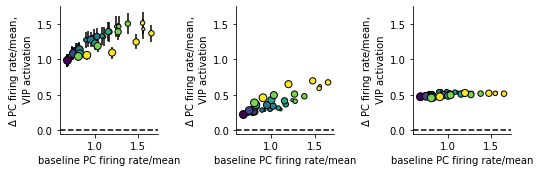

In [58]:
YYs_baseline = [YY_opto_tavg[low_loss],YY_opto_tavg_no_pcpv[low_loss],YY_opto_tavg_no_pcpc[low_loss]]
YYs_opto = [YY_chrimson[low_loss],YY_chrimson_no_pcpv[low_loss],YY_chrimson_no_pcvip[low_loss]]
# YYs_baseline = YYs_baseline[:2]
# YYs_opto = YYs_opto[0,2]
plt.figure(figsize=(7.5,2.5))
# plt.figure(figsize=(5,2.5))
for iYY,(this_YYx,this_YYy) in enumerate(zip(YYs_baseline,YYs_opto)):
    reload(ut)
    itype = 0
    plt.subplot(1,3,iYY+1)
#     plt.subplot(1,2,iYY+1)
    xdata = this_YYx[:,ilight_off,:,:,itype]
    norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
    xdata_norm = xdata/norm_factor
    ydata = this_YYy[:,0,:,:,itype] #this_YYx[:,ilight_halo,:,:,itype]#
    ydata_norm = ydata/norm_factor
    sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.ylim((-0.05,1.75))
    ut.erase_top_right()
    plt.xlabel('baseline PC firing rate/mean')
    plt.ylabel('$\Delta$ PC firing rate/mean, \n VIP activation')
    plt.tight_layout()
#     plt.savefig('figures/sim_pc_delta_vip_chrimson_l4_w_and_wo_recurrence.eps')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

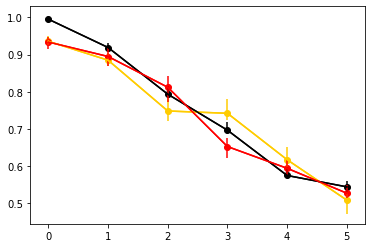

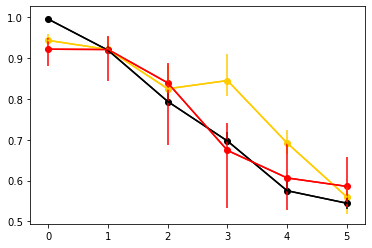

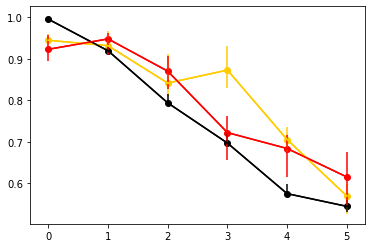

In [500]:
itype = 0
def compute_smi(arr):
    return arr[:,-1]/arr.max(1)
for ilight_on in [0,5,10]:
    smi_chrimson = compute_smi(YY_chrimson[low_loss][:,ilight_on,:,:,itype])
    smi_baseline = compute_smi(YY_opto_tavg[low_loss][:,ilight_off,:,:,itype])
    smi_halo = compute_smi(YY_halo[low_loss][:,ilight_on,:,:,itype])

    plt.figure()
    ut.plot_pct_errorbars_hillel(np.arange(6),smi_halo[:,np.newaxis],colors=np.array((1,0.8,0))[np.newaxis],pct=(16,84))
    ut.plot_pct_errorbars_hillel(np.arange(6),smi_baseline[:,np.newaxis],colors=np.array((0,0,0))[np.newaxis],pct=(16,84))
    ut.plot_pct_errorbars_hillel(np.arange(6),smi_chrimson[:,np.newaxis],colors=np.array((1,0,0))[np.newaxis],pct=(16,84))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


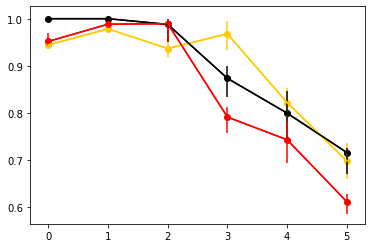

In [497]:
    itype = 0
    smi_chrimson = compute_smi(XX_chrimson[low_loss][:,:,:,itype])
    smi_baseline = compute_smi(XXs[low_loss][:,:,:,itype])
    smi_halo = compute_smi(XX_halo[low_loss][:,:,:,itype])
    
    plt.figure()
    ut.plot_pct_errorbars_hillel(np.arange(6),smi_halo[:,np.newaxis],colors=np.array((1,0.8,0))[np.newaxis],pct=(16,84))
    ut.plot_pct_errorbars_hillel(np.arange(6),smi_baseline[:,np.newaxis],colors=np.array((0,0,0))[np.newaxis],pct=(16,84))
    ut.plot_pct_errorbars_hillel(np.arange(6),smi_chrimson[:,np.newaxis],colors=np.array((1,0,0))[np.newaxis],pct=(16,84))

In [488]:
.shape

(38, 6, 6, 4)

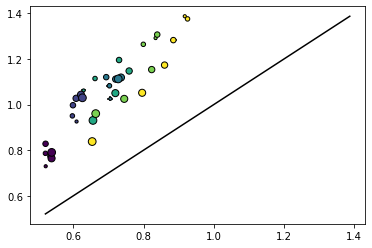

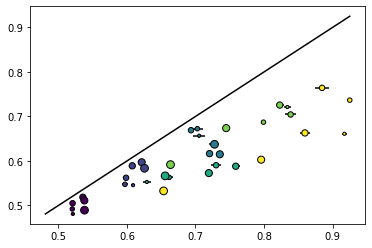

In [490]:
plt.figure()
sca.scatter_size_contrast_errorbar(XXs[low_loss][:,:,:,itype],XX_chrimson[low_loss][:,:,:,itype])

plt.figure()
sca.scatter_size_contrast_errorbar(XXs[low_loss][:,:,:,itype],XX_halo[low_loss][:,:,:,itype])

In [482]:
opto_slope,opto_intercept = (1.3354862894731996, 0.17488607270975498)
opto_res = np.array([[-0.12671991, -0.01322153, -0.05474065,  0.14427694,  0.0810375,   0.05877941],
 [-0.04359068,  0.04517192,  0.0319965,   0.15705451,  0.10854438,  0.02684762],
 [ 0.01588631,  0.10938093,  0.10442682,  0.14219765,  0.09372387, -0.0294109 ],
 [-0.09054879,  0.13555098,  0.04004606,  0.0178427,  -0.09674937, -0.13888121],
 [-0.10901019,  0.13178189,  0.02138491, -0.0464151,  -0.13133009, -0.19108495],
 [-0.07188227,  0.10452566,  0.02749202, -0.09617398, -0.06825297, -0.22536924]])

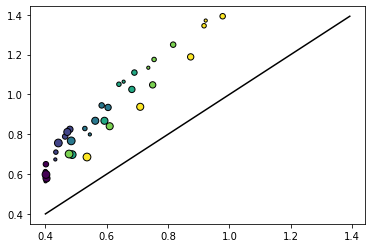

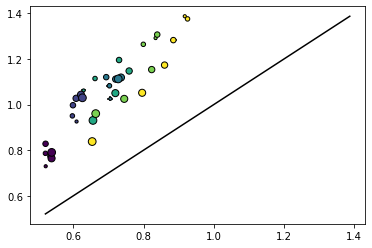

In [494]:
plt.figure()
xdata = np.nanmean(YY_opto_tavg[low_loss][:,ilight_off,:,:,itype],0)
ydata = xdata*opto_slope + opto_intercept*xdata.mean() + opto_res*xdata.mean()
sca.scatter_size_contrast(xdata,ydata)
plt.figure()
sca.scatter_size_contrast_errorbar(XXs[low_loss][:,:,:,itype],XX_chrimson[low_loss][:,:,:,itype])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


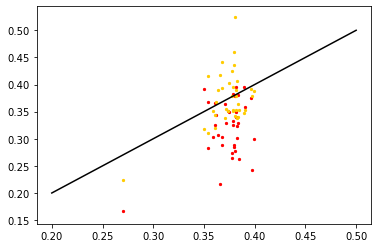

In [501]:
plt.figure()
plt.scatter(smi_baseline[:,1]-smi_baseline[:,5],smi_chrimson[:,1]-smi_chrimson[:,5],s=5,c='r')
plt.scatter(smi_baseline[:,1]-smi_baseline[:,5],smi_halo[:,1]-smi_halo[:,5],s=5,c=np.array((1,0.8,0)))
plt.plot((0.2,0.5),(0.2,0.5),c='k')

In [395]:
YY_chrimson[low_loss].shape

(38, 11, 6, 6, 8)

In [396]:
YY_opto_tavg[low_loss].shape

(38, 21, 6, 6, 8)

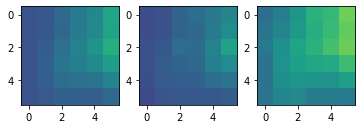

In [417]:
plt.figure()
for ivar,YY in enumerate([YY_opto_tavg[:,ilight_off],YY_halo[:,ilight_on],YY_chrimson[:,ilight_on]]):
    plt.subplot(1,3,ivar+1)
    plt.imshow(np.nanmean(YY[low_loss],0)[:,:,0],vmin=0,vmax=YY_chrimson[low_loss,0].max())

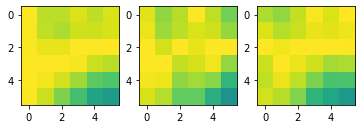

In [424]:
plt.figure()
for ivar,YY in enumerate([YY_opto_tavg[:,ilight_off],YY_halo[:,ilight_on],YY_chrimson[:,ilight_on]]):
    plt.subplot(1,3,ivar+1)
    this_data = np.nanmean(YY[low_loss],0)[:,:,0]
    plt.imshow(this_data/this_data.max(0)[np.newaxis],vmin=0,vmax=1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

(38, 7, 6)
1.7224710029407242
(38, 7, 6)
0.9719506622413873


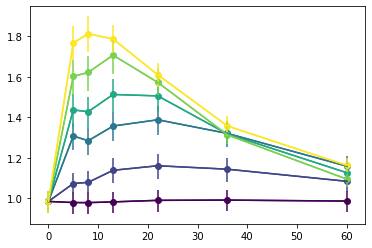

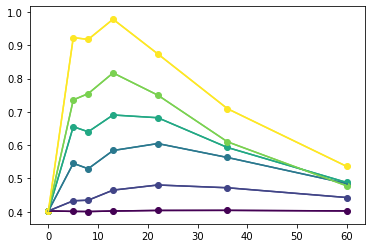

In [318]:
itype = 0
reload(sca)
plt.figure()
sca.plot_bootstrapped_size_tuning(YY_chrimson[low_loss][:,0,:,:,itype])
plt.figure()
sca.plot_bootstrapped_size_tuning(YY_opto_tavg[low_loss][:,ilight_off,:,:,itype])

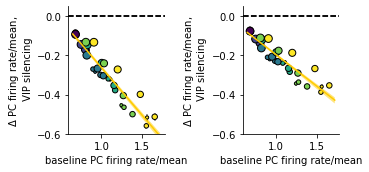

In [296]:
import opto_utils
YYs_baseline = [YY_opto_tavg[low_loss],YY_opto_tavg_no_pcpv[low_loss],YY_opto_tavg_no_pcpc[low_loss]]
YYs_opto = [YY_halo[low_loss],YY_halo_no_pcvip[low_loss]]
# YYs_baseline = YYs_baseline[:2]
# YYs_opto = YYs_opto[0,2]
plt.figure(figsize=(5,2.5))
# plt.figure(figsize=(5,2.5))
for iYY,(this_YYx,this_YYy) in enumerate(zip(YYs_baseline,YYs_opto)):
    reload(ut)
    itype = 0
    plt.subplot(1,2,iYY+1)
#     plt.subplot(1,2,iYY+1)
    xdata = this_YYx[:,ilight_off,:,:,itype]
    norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
    xdata_norm = xdata/norm_factor
    ydata = this_YYy[:,0,:,:,itype] #this_YYx[:,ilight_halo,:,:,itype]#
    ydata_norm = ydata/norm_factor
#     sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    cat_data = np.concatenate((xdata_norm[:,:,:,np.newaxis],ydata_norm[:,:,:,np.newaxis]),axis=-1)
    opto_utils.scatter_size_contrast_x_dx_errorbar(cat_data,opto_color=np.array((1,0.8,0)))    
    plt.axhline(0,c='k',linestyle='dashed')
    plt.ylim((-0.6,0.05))
    ut.erase_top_right()
    plt.xlabel('baseline PC firing rate/mean')
    plt.ylabel('$\Delta$ PC firing rate/mean, \n VIP silencing')
    plt.tight_layout()
#     plt.savefig('figures/sim_pc_delta_vip_halo_l4_w_and_wo_pcvip.jpg',dpi=300)

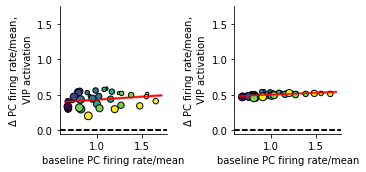

In [30]:
import opto_utils
YYs_baseline = [YY_opto_tavg[low_loss],YY_opto_tavg_no_pcpv[low_loss],YY_opto_tavg_no_pcpc[low_loss]]
YYs_opto = [YY_chrimson[low_loss],YY_chrimson_no_pcvip[low_loss]]
# YYs_baseline = YYs_baseline[:2]
# YYs_opto = YYs_opto[0,2]
plt.figure(figsize=(5,2.5))
# plt.figure(figsize=(5,2.5))
for iYY,(this_YYx,this_YYy) in enumerate(zip(YYs_baseline,YYs_opto)):
    reload(ut)
    itype = 0
    plt.subplot(1,2,iYY+1)
#     plt.subplot(1,2,iYY+1)
    xdata = this_YYx[:,ilight_off,:,:,itype]
    norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
    xdata_norm = xdata/norm_factor
    ydata = this_YYy[:,0,:,:,itype] #this_YYx[:,ilight_halo,:,:,itype]#
    ydata_norm = ydata/norm_factor
#     sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    cat_data = np.concatenate((xdata_norm[:,:,:,np.newaxis],ydata_norm[:,:,:,np.newaxis]),axis=-1)
    opto_utils.scatter_size_contrast_x_dx_errorbar(cat_data,opto_color='r')
    plt.axhline(0,c='k',linestyle='dashed')
    plt.ylim((-0.05,1.75))
    ut.erase_top_right()
    plt.xlabel('baseline PC firing rate/mean')
    plt.ylabel('$\Delta$ PC firing rate/mean, \n VIP activation')
    plt.tight_layout()
#     plt.savefig('figures/sim_pc_delta_vip_chrimson_l4_w_and_wo_pcvip.jpg',dpi=300)

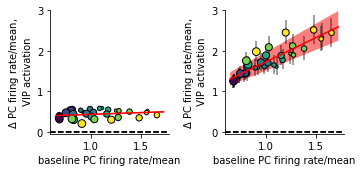

In [31]:
import opto_utils
YYs_baseline = [YY_opto_tavg[low_loss],YY_opto_tavg_no_pcpv[low_loss],YY_opto_tavg_no_pcpc[low_loss]]
YYs_opto = [YY_chrimson[low_loss],YY_chrimson_no_pcsst[low_loss]]
# YYs_baseline = YYs_baseline[:2]
# YYs_opto = YYs_opto[0,2]
plt.figure(figsize=(5,2.5))
# plt.figure(figsize=(5,2.5))
for iYY,(this_YYx,this_YYy) in enumerate(zip(YYs_baseline,YYs_opto)):
    reload(ut)
    itype = 0
    plt.subplot(1,2,iYY+1)
#     plt.subplot(1,2,iYY+1)
    xdata = this_YYx[:,ilight_off,:,:,itype]
    norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
    xdata_norm = xdata/norm_factor
    ydata = this_YYy[:,0,:,:,itype] #this_YYx[:,ilight_halo,:,:,itype]#
    ydata_norm = ydata/norm_factor
#     sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    cat_data = np.concatenate((xdata_norm[:,:,:,np.newaxis],ydata_norm[:,:,:,np.newaxis]),axis=-1)
    opto_utils.scatter_size_contrast_x_dx_errorbar(cat_data,opto_color='r')
    plt.axhline(0,c='k',linestyle='dashed')
    plt.ylim((-0.05,3))
    ut.erase_top_right()
    plt.xlabel('baseline PC firing rate/mean')
    plt.ylabel('$\Delta$ PC firing rate/mean, \n VIP activation')
    plt.tight_layout()
#     plt.savefig('figures/sim_pc_delta_vip_chrimson_l4_w_and_wo_pcvip.jpg',dpi=300)

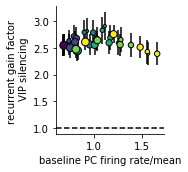

In [32]:
# plt.figure(figsize=(5,2.5))
plt.figure(figsize=(2.5,2.5))
this_YY1 = YY_opto_tavg[low_loss]
for iYY,this_YY2 in enumerate([YY_opto_tavg_no_pcpv[low_loss]]):#,YY_opto_tavg_no_pcpc[low_loss]]):
    reload(ut)
    itype = 0
#     plt.subplot(1,2,iYY+1)
    xdata = this_YY1[:,ilight_off,:,:,itype]
    norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
    xdata_norm = xdata/norm_factor
    ydata1 = this_YY1[:,ilight_halo,:,:,itype]
    ydata1_norm = ydata1/norm_factor
    ydata2 = this_YY2[:,ilight_halo,:,:,itype]
    ydata2_norm = ydata2/norm_factor
    sca.scatter_size_contrast_errorbar(xdata_norm,(ydata1_norm-xdata_norm)/(ydata2_norm-xdata_norm),equality_line=False,square=False)
    plt.axhline(1,c='k',linestyle='dashed')
#     plt.ylim((-0.05,1.05))
    ut.erase_top_right()
    plt.xlabel('baseline PC firing rate/mean')
    plt.ylabel('recurrent gain factor \n VIP silencing')
    plt.tight_layout()
#     plt.savefig('figures/sim_pc_recurrent_gain_factor_vip_halo.eps')

In [231]:
this_YY2.shape

(38, 1, 6, 6, 8)

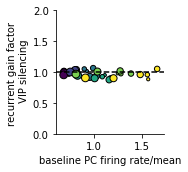

In [33]:
# plt.figure(figsize=(5,2.5))
plt.figure(figsize=(2.5,2.5))
this_YY1 = YY_opto_tavg[low_loss]
ylim = np.array((0,2))
for iYY,this_YY2 in enumerate([YY_halo_no_pcpv[low_loss]]):#,YY_opto_tavg_no_pcpc[low_loss]]):
    reload(ut)
    itype = 0
#     plt.subplot(1,2,iYY+1)
    xdata = this_YY1[:,ilight_off,:,:,itype]
    norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
    xdata_norm = xdata/norm_factor
    ydata1 = YY_halo[low_loss][:,0,:,:,itype]
    ydata1_norm = ydata1/norm_factor
    ydata2 = this_YY2[:,0,:,:,itype]
    ydata2_norm = ydata2/norm_factor
    sca.scatter_size_contrast_errorbar(xdata_norm,ydata1_norm/ydata2_norm,equality_line=False,square=False)
#     sca.scatter_size_contrast_errorbar(xdata_norm,(ydata1_norm-xdata_norm)/(ydata2_norm-xdata_norm),equality_line=False,square=False)
    plt.axhline(1,c='k',linestyle='dashed')
#     plt.ylim((-0.05,1.05))
    ut.erase_top_right()
    plt.xlabel('baseline PC firing rate/mean')
    plt.ylabel('recurrent gain factor \n VIP silencing')
    plt.ylim(ylim)
    plt.tight_layout()
#     plt.savefig('figures/sim_pc_recurrent_gain_factor_vip_halo_l4.eps')

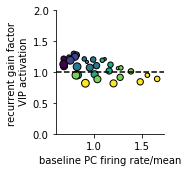

In [34]:
# plt.figure(figsize=(5,2.5))
plt.figure(figsize=(2.5,2.5))
this_YY1 = YY_opto_tavg[low_loss]
for iYY,this_YY2 in enumerate([YY_chrimson_no_pcpv[low_loss]]):#,YY_opto_tavg_no_pcpc[low_loss]]):
    reload(ut)
    itype = 0
#     plt.subplot(1,2,iYY+1)
    xdata = this_YY1[:,ilight_off,:,:,itype]
    norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
    xdata_norm = xdata/norm_factor
    ydata1 = YY_chrimson[low_loss][:,0,:,:,itype]
    ydata1_norm = ydata1/norm_factor
    ydata2 = this_YY2[:,0,:,:,itype]
    ydata2_norm = ydata2/norm_factor
    sca.scatter_size_contrast_errorbar(xdata_norm,ydata1_norm/ydata2_norm,equality_line=False,square=False)
#     sca.scatter_size_contrast_errorbar(xdata_norm,(ydata1_norm-xdata_norm)/(ydata2_norm-xdata_norm),equality_line=False,square=False)
    plt.axhline(1,c='k',linestyle='dashed')
#     plt.ylim((-0.05,1.05))
    ut.erase_top_right()
    plt.xlabel('baseline PC firing rate/mean')
    plt.ylabel('recurrent gain factor \n VIP activation')
    plt.ylim(ylim)
    plt.tight_layout()
#     plt.savefig('figures/sim_pc_recurrent_gain_factor_vip_chrimson_l4.eps')

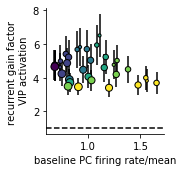

In [35]:
# plt.figure(figsize=(5,2.5))
plt.figure(figsize=(2.5,2.5))
this_YY1 = YY_opto_tavg[low_loss]
for iYY,this_YY2 in enumerate([YY_opto_tavg_no_pcpv[low_loss]]):#,YY_opto_tavg_no_pcpc[low_loss]]):
    reload(ut)
    itype = 0
#     plt.subplot(1,2,iYY+1)
    xdata = this_YY1[:,ilight_off,:,:,itype]
    norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
    xdata_norm = xdata/norm_factor
    ydata1 = this_YY1[:,ilight_chrimson,:,:,itype]
    ydata1_norm = ydata1/norm_factor
    ydata2 = this_YY2[:,ilight_chrimson,:,:,itype]
    ydata2_norm = ydata2/norm_factor
    sca.scatter_size_contrast_errorbar(xdata_norm,(ydata1_norm-xdata_norm)/(ydata2_norm-xdata_norm),equality_line=False,square=False)
    plt.axhline(1,c='k',linestyle='dashed')
#     plt.ylim((-0.05,1.05))
    ut.erase_top_right()
    plt.xlabel('baseline PC firing rate/mean')
    plt.ylabel('recurrent gain factor \n VIP activation')
    plt.tight_layout()
#     plt.savefig('figures/sim_pc_recurrent_gain_factor_vip_chrimson.eps')

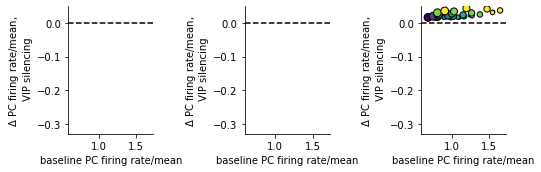

In [53]:
plt.figure(figsize=(7.5,2.5))
for iYY,this_YY in enumerate([YY_opto_tavg[low_loss],YY_opto_tavg_no_pcpv[low_loss],YY_opto_tavg_no_pcpc[low_loss]]):
    reload(ut)
    itype = 0
    plt.subplot(1,3,iYY+1)
    xdata = this_YY[:,ilight_off,:,:,itype]
    norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
    xdata_norm = xdata/norm_factor
    ydata = this_YY[:,ilight_chrimson,:,:,itype]
    ydata_norm = ydata/norm_factor
    sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.ylim((-0.33,0.05))
    ut.erase_top_right()
    plt.xlabel('baseline PC firing rate/mean')
    plt.ylabel('$\Delta$ PC firing rate/mean, \n VIP silencing')
    plt.tight_layout()
#     plt.savefig('figures/sim_pc_delta_vip_halo_w_and_wo_recurrence.eps')

In [178]:
opto_levels[ilight_halo]

-1.0

In [90]:
# fit_lbl = '201128b'
fit_lbl = '201210a'
npyfile = np.load('../shared_data/calnet_data/dynamics/opto_tavg_%s.npy'%fit_lbl,allow_pickle=True)[()]
shp = npyfile['YY_opto'].shape
YY_opto_tavg = npyfile['YY_opto'].reshape(shp[:2]+(6,6)+shp[3:])
weights_files = glob.glob('../shared_data/calnet_data/weights/weights_%s/*.npy'%fit_lbl)
weights_files.sort()

In [91]:
nwt = len(weights_files)
mdls = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    mdls[iwt] = cc.ModelOri(wtdict,nT=1)

In [92]:
iwt = 0
nQ,nS,nT = mdls[iwt].nQ,mdls[iwt].nS,mdls[iwt].nT
bltiles = np.zeros((nwt,nQ*nS*nT))
amps = np.ones((nwt,nQ*nS*nT))
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    if 'bl' in wtdict:
        bl = wtdict['bl']
        bltiles[iwt] = np.tile(bl,nS*nT)
    if 'amp' in wtdict:
        amps[iwt] = wtdict['amp']

In [93]:
opto_levels = np.linspace(-2,2,21)
nopto = opto_levels.size

In [94]:
import calnet.utils
import sim_utils
nfiles = len(weights_files)
# Ts = np.zeros((nfiles,nQ))
iwt = 0
nN,nP,nQ,nS,nT = mdls[iwt].nN,mdls[iwt].nP,mdls[iwt].nQ,mdls[iwt].nS,mdls[iwt].nT
Ks = np.zeros((nfiles,nQ))
Wmys = np.zeros((nfiles,nQ,nQ))
Wmxs = np.zeros((nfiles,nP,nQ))
s02s = np.zeros((nfiles,nQ))
YYs = np.zeros((nfiles,6,6,nQ*nS*nT))
XXs = np.zeros((nfiles,6,6,nP*nS*nT))
Etas = np.zeros((nfiles,6,6,nQ*nS*nT))
# Eta1s = np.zeros((nfiles,6,6,nQ*nS*nT))
# Eta2s = np.zeros((nfiles,6,6,nQ*nS*nT))
h1s = np.zeros((nfiles,))
h2s = np.zeros((nfiles,))
losses = np.zeros((nfiles,))
couplings = np.zeros((nfiles,nopto,6,6,nQ*nS*nT,nQ*nS*nT))
phis = np.zeros((nfiles,nopto,6,6,nQ*nS*nT))
for iwt,weights_file in enumerate(weights_files):
    Wstar_dict = np.load(weights_file,allow_pickle=True)[()]
#     Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h = Wstar_dict['as_list']
    try:
        Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,bl = Wstar_dict['as_list']
        amp = np.ones((nQ*nS*nT,))
    except:
        Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,bl,amp = Wstar_dict['as_list']
    losses[iwt] = Wstar_dict['loss']
#     Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,h3,Eta1,Eta2,Eta3 = Wstar_dict['as_list']
    WWmy = calnet.utils.gen_Weight_k_kappa_t(Wmy,K,kappa,T,nS=nS,nT=nT)
    WWmx = calnet.utils.gen_Weight_k_kappa_t(Wmx,K,kappa,T,nS=nS,nT=nT)
    tiled_s02 = np.tile(s02,nS*nT)
#     Ts[iwt] = T
    Ks[iwt] = K
    Wmys[iwt] = Wmy
    Wmxs[iwt] = Wmx
    s02s[iwt] = s02
    YY0 = sim_utils.f_miller_troyer(Eta,Xi**2+tiled_s02)
    YYs[iwt] = amp*YY0.reshape((6,6,nQ*nS*nT)) + np.tile(bl,nS*nT)[np.newaxis]
    XXs[iwt] = XX.reshape((6,6,nP*nS*nT))
    Etas[iwt] = Eta.reshape((6,6,nQ*nS*nT))
    h1s[iwt] = h1
    h2s[iwt] = h2
    bltile = np.tile(bl,nS*nT)
    for ilight in range(YY_opto_tavg.shape[1]):
        this_YY = 1/amp[np.newaxis,:]*(YY_opto_tavg[iwt,ilight].reshape((nN,nQ*nS*nT)) - bltile[np.newaxis,:])
#         this_YY = YY_opto_tavg[iwt,ilight].reshape((nN,nQ*nS*nT))
        phis[iwt,ilight] = mdls[iwt].fprimeXY(mdls[iwt].XX,this_YY).reshape((6,6,nQ*nS*nT))
    for istim in range(nN):
        iistim,jjstim = np.unravel_index(istim,(6,6))
#         phis[iwt,iistim,jjstim] = calnet.utils.fprime_miller_troyer(Eta[istim],Xi[istim]**2+tiled_s02)
        for ilight in range(nopto):
            Phi = np.diag(phis[iwt,ilight,iistim,jjstim])
            couplings[iwt,ilight,iistim,jjstim] = Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)

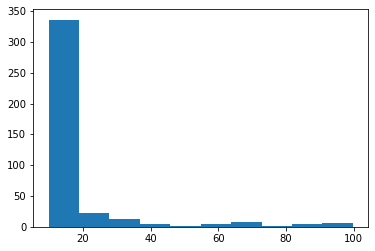

In [95]:
plt.figure()
plt.hist(losses[losses<100])
#lcutoff defined above
low_loss = (losses<lcutoff)

In [96]:
# ilight_halo = 8
# ilight_chrimson = 16
# ilight_off = 10
ilight_halo = 5
ilight_chrimson = 15
ilight_off = 10


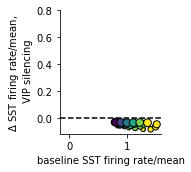

In [97]:
reload(ut)
itype = 1
plt.figure(figsize=(2.5,2.5))
xdata = YY_opto_tavg[low_loss][:,ilight_off,:,:,itype]
norm_factor = ut.mult_apply(xdata,np.nanmean,[1,2],keepdims=True)
xdata_norm = xdata/norm_factor
ydata = YY_opto_tavg[low_loss][:,ilight_halo,:,:,itype]
ydata_norm = ydata/norm_factor
sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False)
plt.axhline(0,c='k',linestyle='dashed')
plt.ylim((-0.12,0.8))
ut.erase_top_right()
plt.xlabel('baseline SST firing rate/mean')
plt.ylabel('$\Delta$ SST firing rate/mean, \n VIP silencing')
plt.tight_layout()
plt.savefig('figures/sim_sst_delta_vip_halo_no_wvipsst.eps')